* **Setup**

In [9]:
import sys, os
current_directory = os.getcwd()
root_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
sys.path.append(root_directory)

* **Import utils**

In [10]:
from pretrained.predictor import SingleKModel, MultiKModel, OneTestKModel, BatchSingleKModel

* **Predict**

1- Using single K Model

In [11]:
kmodel = SingleKModel(kmer_size=3)
kmodel.load("../data/testset-full/testset.csv", format="csv")
genboard = kmodel.predict()

Predicting: 100%|███████████████████████████████| 58/58 [17:54<00:00, 18.53s/it]


In [12]:
genboard.display()

In [13]:
genboard.prediction.shape

(64091, 58)

* **Confusion report for validation**

In [14]:
import json
import pandas as pd

true_label = pd.read_csv('../data/testset-full/true_labels.csv')['true_label'].values
with open('../data/testset-full/class_mapping.json', 'r') as json_file:
    class_mapping = json.load(json_file)


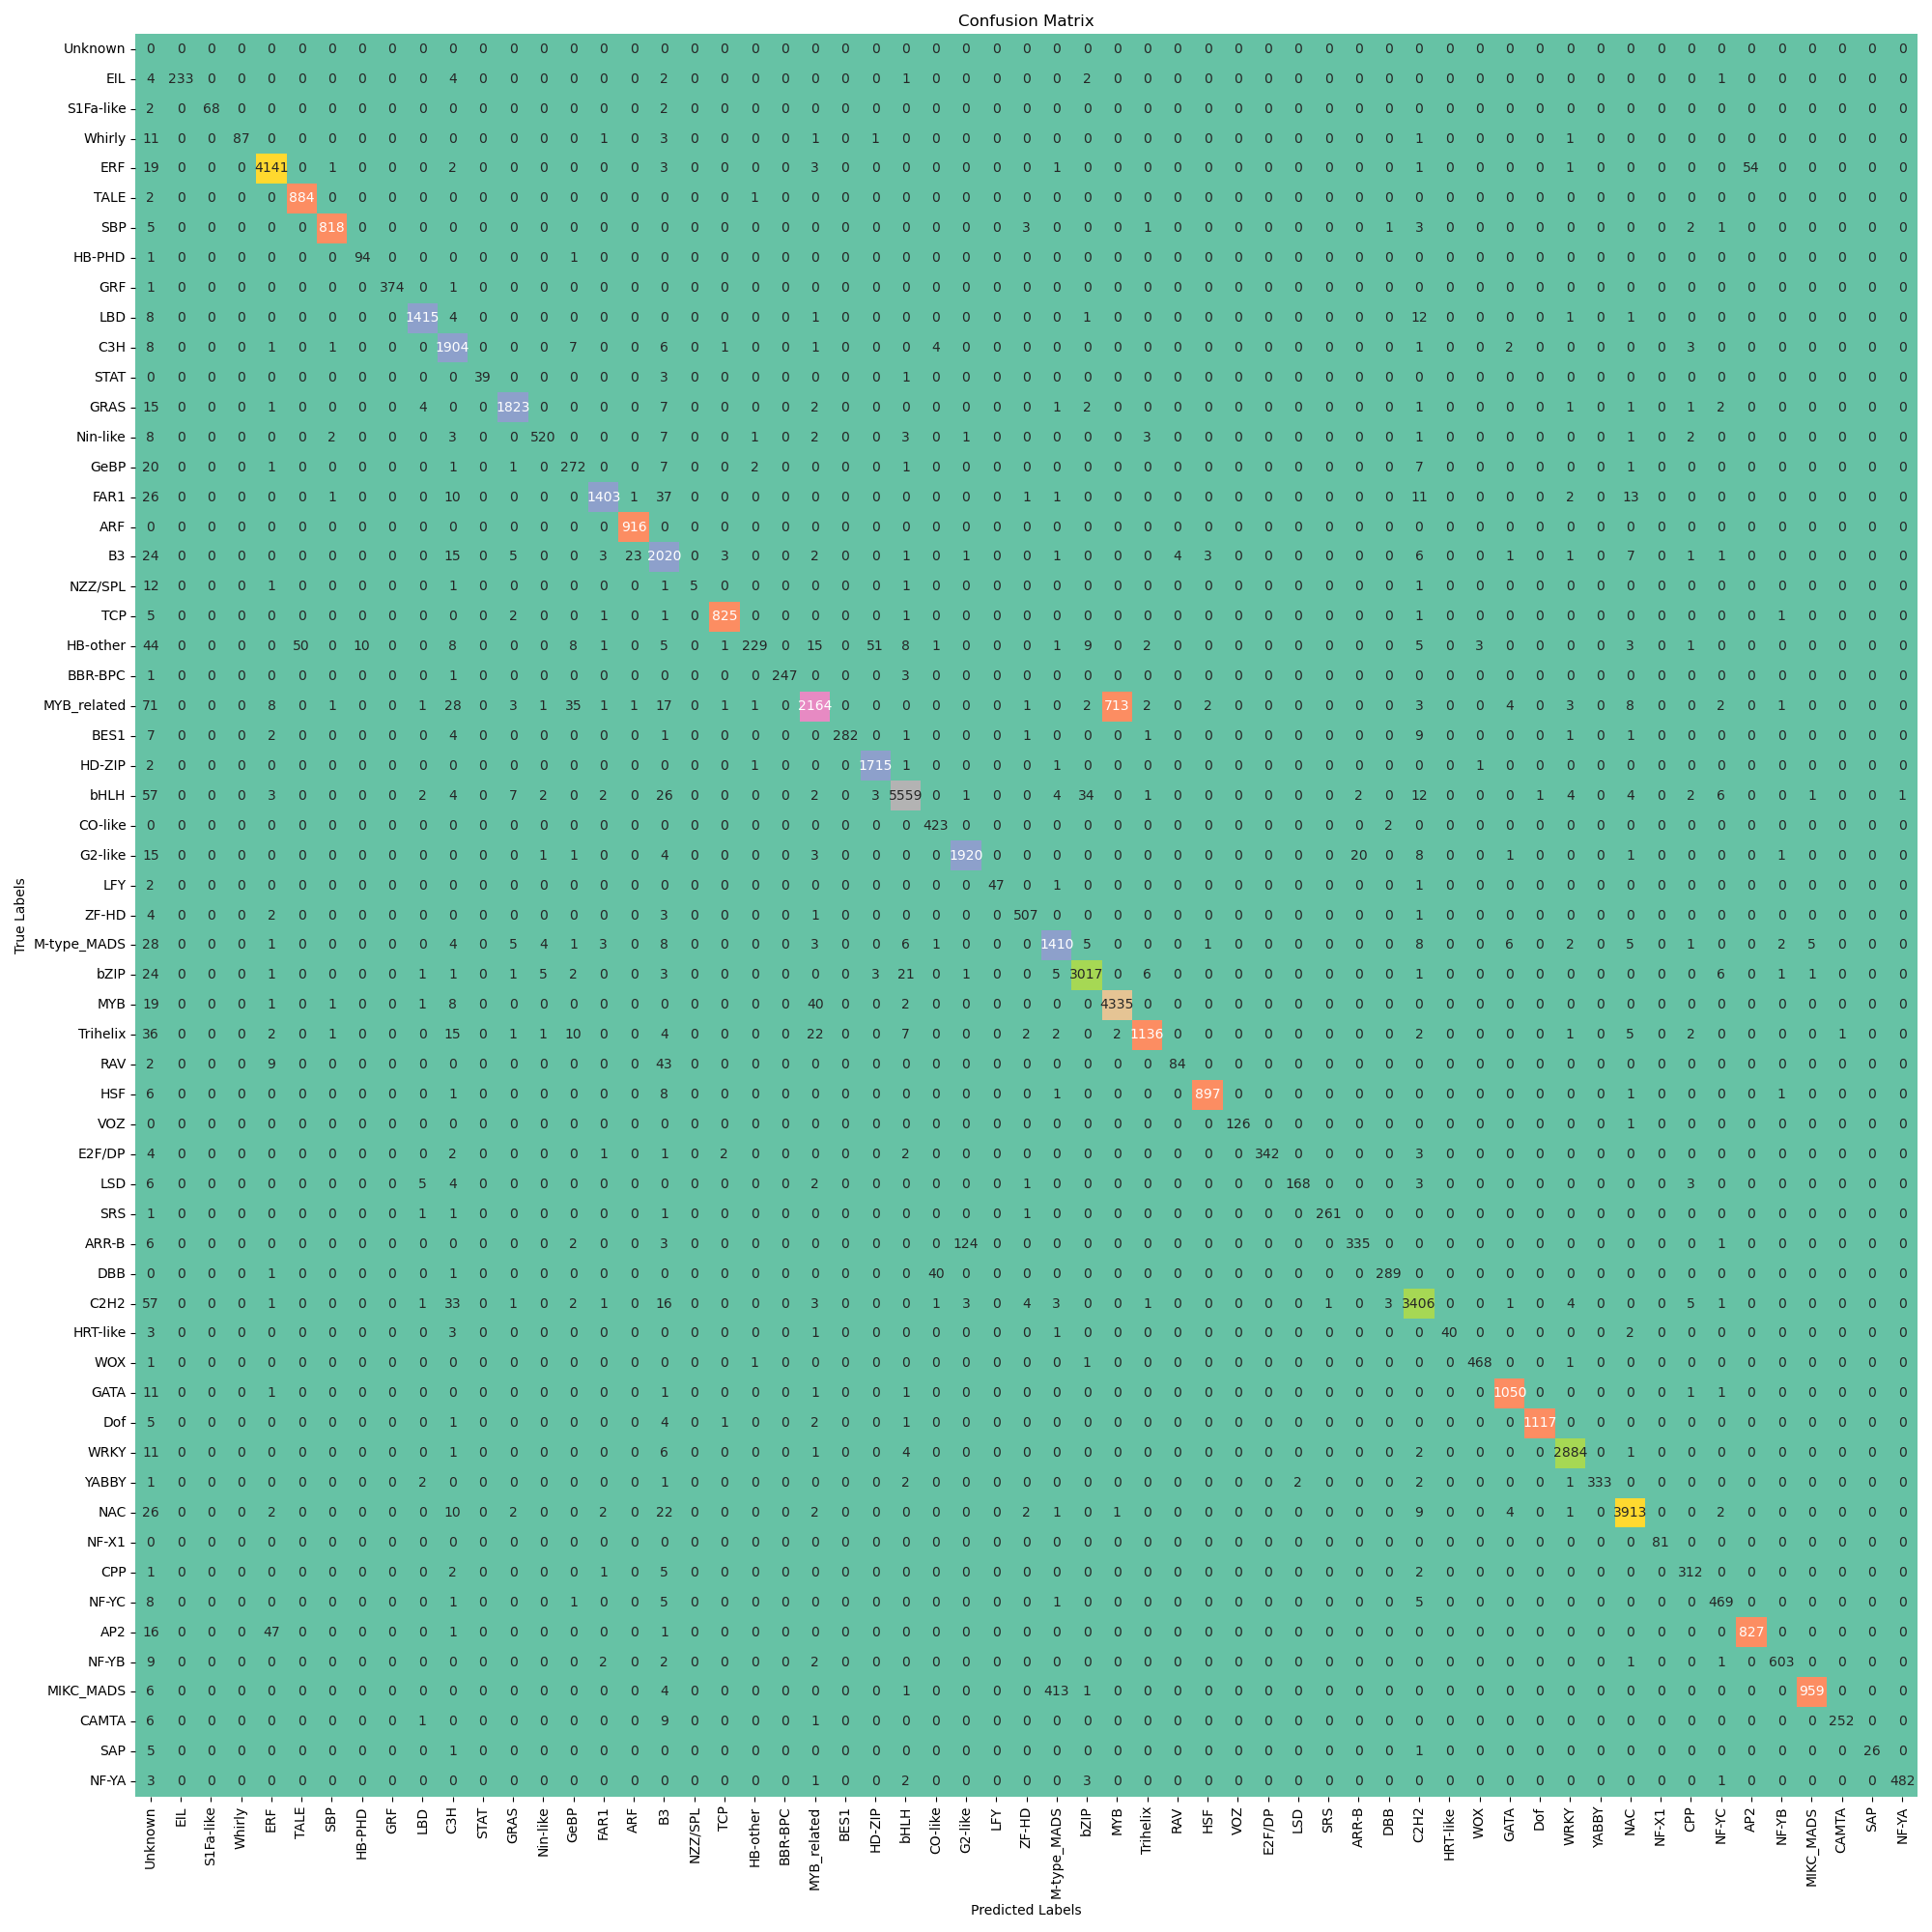
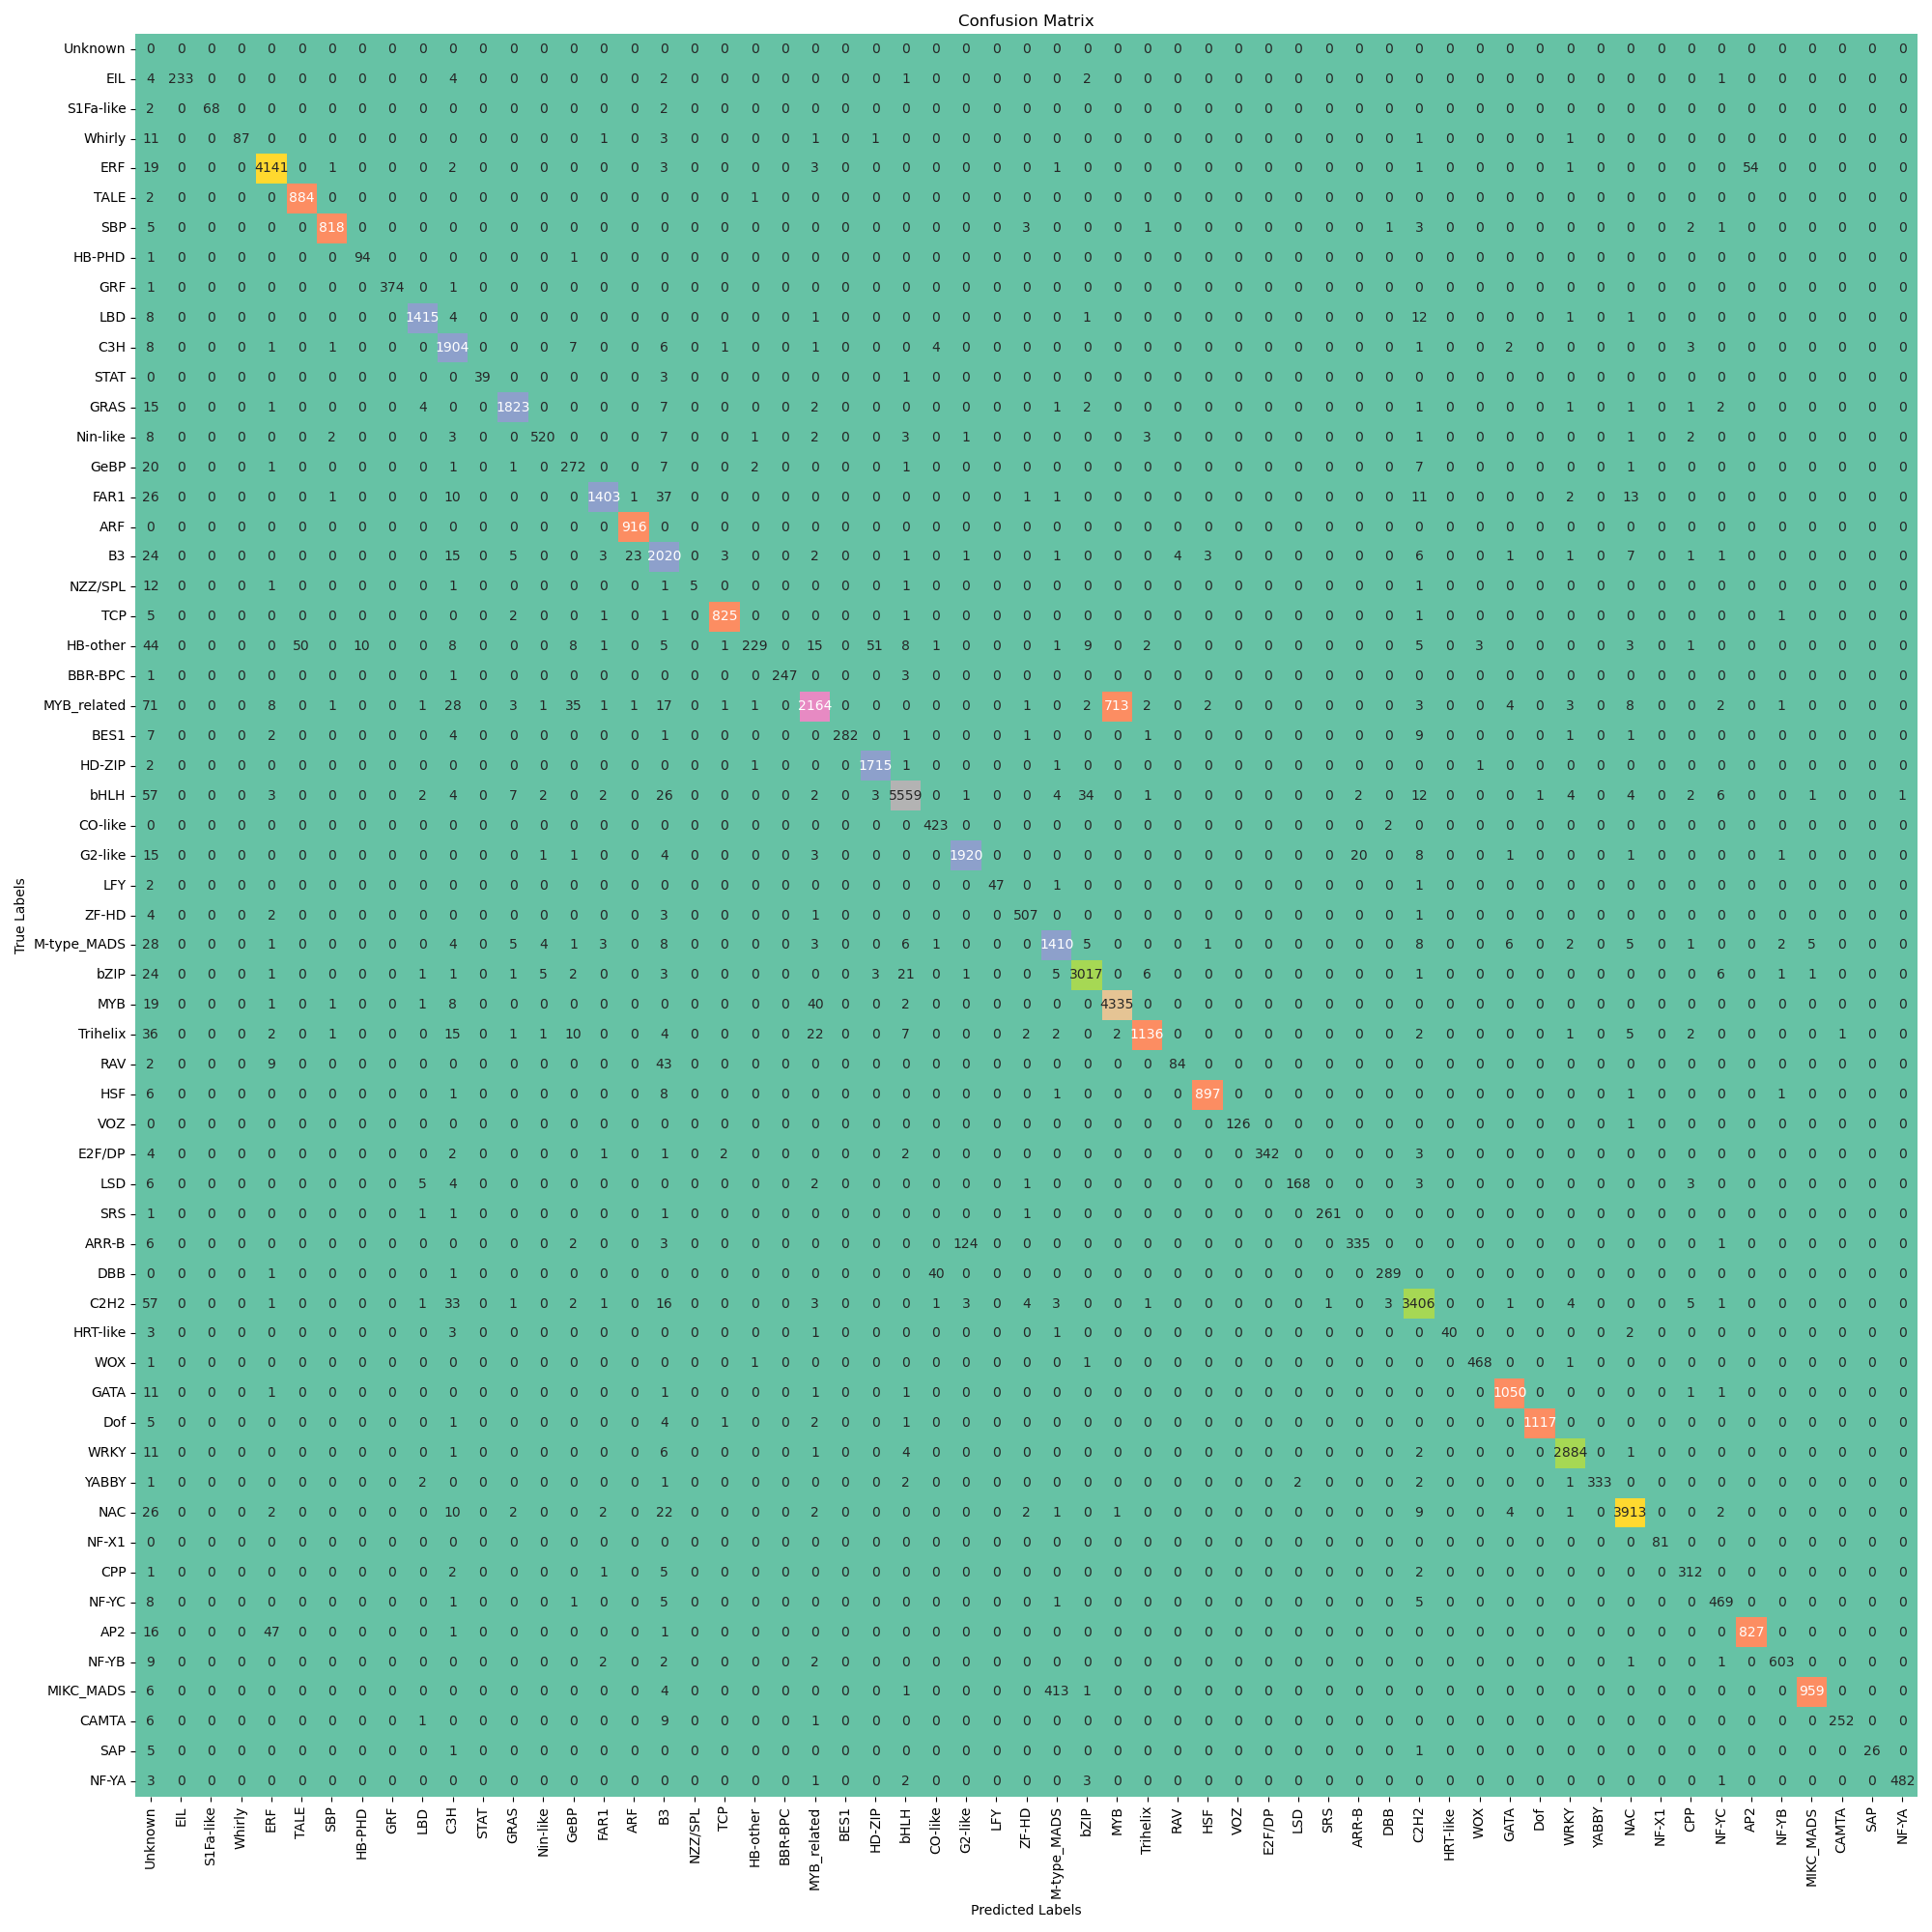

In [15]:
genboard.show_eval_metric(
    true_label=true_label,
    class_mapping_rules=class_mapping,
    voting_method="Two-Stage Voting",
    voting_threshold=0.5,
    binary_class_threshold=0.5,
    components=['confusion_matrix', 'general_accuracy', 'accuracy_per_family']
)

In [16]:
len([1 for i in range(len(true_label)) if true_label[i] == class_mapping['bHLH']])

5740